# Problem and Data Description

## Problem Description

The "Natural Language Processing with Disaster Tweets" competition challenges participants to develop a machine learning model that can accurately classify tweets into two categories: those referring to real disasters and those that do not. The goal is to analyze tweet content and determine whether it conveys information about an actual disaster. This is framed as a binary classification problem.

This project is about using social media analysis for emergency response efforts. The data in this project are tweets. There are three meaningful features: the full text of the tweet, the location from which the tweet was made, and a keyword the authors tagged as potentially indicating an accident.

This task falls within the domain of Natural Language Processing (NLP), a branch of artificial intelligence focused on enabling computers to understand and process human language. In this context, NLP techniques are applied to tweet text to identify whether it relates to a real-world disaster, enhancing the ability to respond rapidly to emergency situations.



In [1]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
!pwd

/content


In [3]:
import os
os.listdir(".")

['.config', 'test.csv', 'train.csv', 'sample_submission.csv', 'sample_data']

In [4]:
import pandas as pd
import numpy as np

## Data Description

In [5]:
train_df = pd.read_csv("./train.csv")
display(train_df.head(), train_df.describe(include='all'))
print(train_df.shape)
train_df.info()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


(7613, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


**We have 7613 rows of data and 5 columns**

**Columns**

* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)





# Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

In [6]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training data
print("Training Data Head:")
print(train_df.head())

# Display the first few rows of the test data
print("\nTest Data Head:")
print(test_df.head())

# Dataset sizes
print("\nTraining Data Size:", train_df.shape)
print("Test Data Size:", test_df.shape)

# Check for missing values in the training data
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

# Check for missing values in the test data
print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())

# Basic statistics of the training data
print("\nTraining Data Description:")
print(train_df.describe(include='all'))

# Distribution of the target variable
print("\nDistribution of the 'target' Variable:")
print(train_df['target'].value_counts(normalize=True))

Training Data Head:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Test Data Head:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in C

**Distribution of Target Variable**

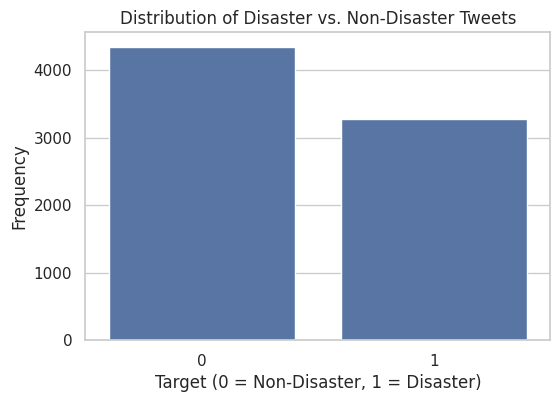

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Target (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Frequency')
plt.show()


**This may not be 50:50 split but it is not so imbalanced that would require augmented data**

**Distribution of Tweet Lengths and Word Count**

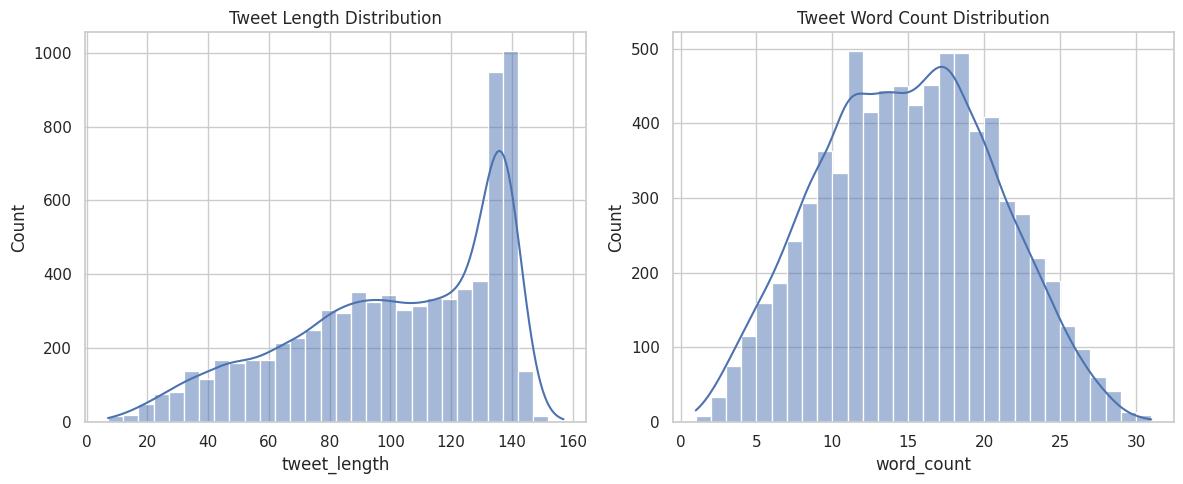

In [8]:
# Calculate tweet length and word count
train_df['tweet_length'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_df['tweet_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train_df['word_count'], bins=30, kde=True)
plt.title('Tweet Word Count Distribution')

plt.tight_layout()
plt.show()


**Most Common Words in Disaster and Non-Disaster Tweets**

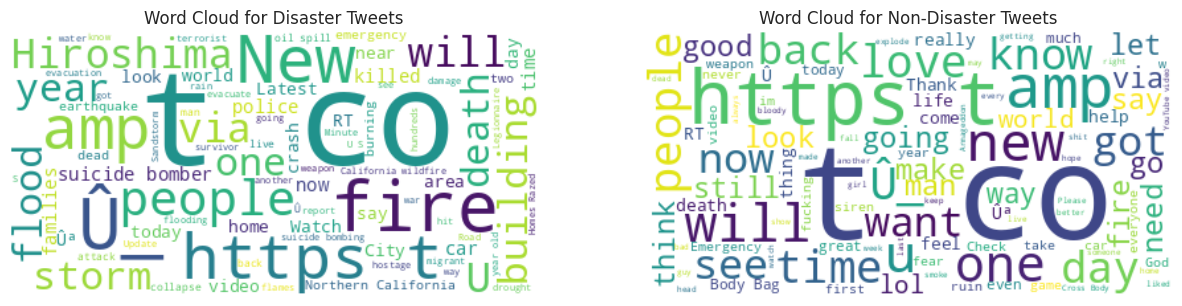

In [9]:
from wordcloud import WordCloud

# Combine all tweets for each category
disaster_tweets = ' '.join(train_df[train_df['target'] == 1]['text'])
non_disaster_tweets = ' '.join(train_df[train_df['target'] == 0]['text'])

# Generate word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
wordcloud_dis = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(disaster_tweets)
plt.imshow(wordcloud_dis, interpolation="bilinear")
plt.title('Word Cloud for Disaster Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_nondis = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(non_disaster_tweets)
plt.imshow(wordcloud_nondis, interpolation="bilinear")
plt.title('Word Cloud for Non-Disaster Tweets')
plt.axis('off')

plt.show()


**Distribution of the Keyword Feature**

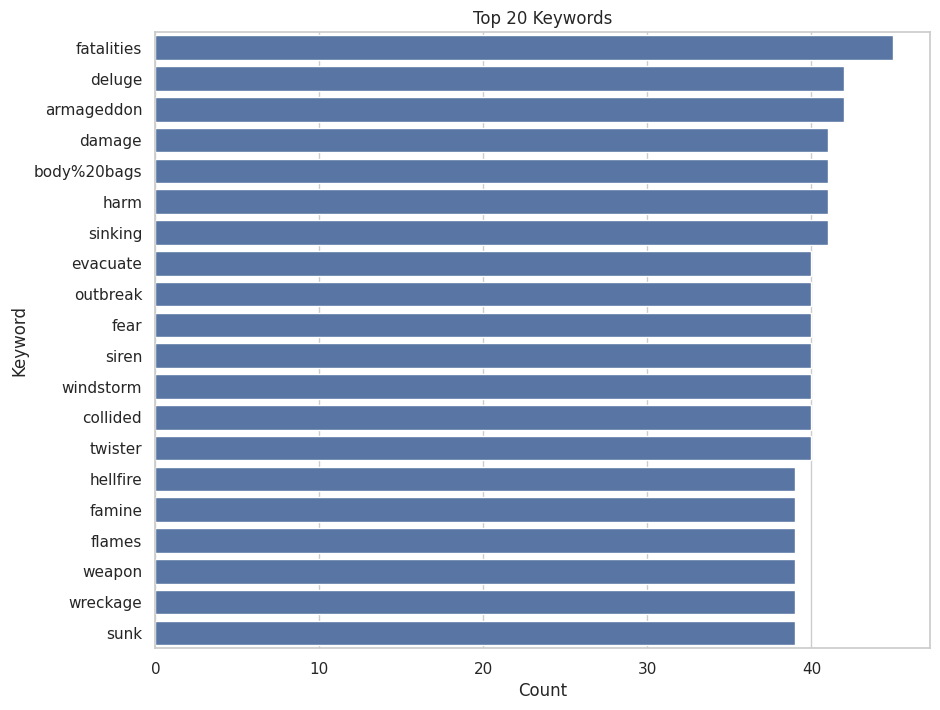

In [10]:
# Top 20 keywords in the dataset
plt.figure(figsize=(10, 8))
sns.countplot(y='keyword', data=train_df, order = train_df['keyword'].value_counts().iloc[:20].index)
plt.title('Top 20 Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()


## Missing Data Handling

In [11]:
# Check for missing values in the training data
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

# Check for missing values in the test data
print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())


Missing Values in Training Data:
id                 0
keyword           61
location        2533
text               0
target             0
tweet_length       0
word_count         0
dtype: int64

Missing Values in Test Data:
id             0
keyword       26
location    1105
text           0
dtype: int64


We have some missing data in the keyword and location columns. Typically, handling missing data is an important step in data preprocessing. However, in this case, the primary feature for predicting the target variable is the tweet text, so the location may not be essential for our model. As for the keyword column, the number of missing entries is relatively small. We could choose to drop those rows or retain them. For now, we’ll keep the rows and replace the missing keyword values with a placeholder like "unknown" to maintain the dataset's integrity.

In [12]:
# Replace missing values in the 'keyword' column with 'unknown' in the training data
train_df['keyword'] = train_df['keyword'].fillna('unknown')

# Replace missing values in the 'keyword' column with 'unknown' in the test data
test_df['keyword'] = test_df['keyword'].fillna('unknown')

# You can verify the changes by checking for missing values again
print("Missing Values in Training Data after Replacement:")
print(train_df['keyword'].isnull().sum())

print("Missing Values in Test Data after Replacement:")
print(test_df['keyword'].isnull().sum())


Missing Values in Training Data after Replacement:
0
Missing Values in Test Data after Replacement:
0


**Top keywords for positive class**

<Axes: ylabel='keyword'>

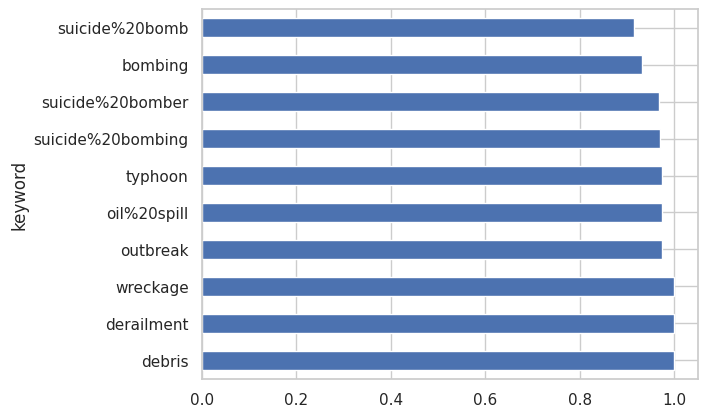

In [13]:
train_df.groupby('keyword')['target'].mean().sort_values(ascending=False).head(10).plot(kind='barh')

**Data Imputation**


We replaced the missing values in the keyword column for both the training and test datasets to ensure consistent preprocessing, which is essential for NLP tasks. The test data is not being used for any other purpose at this stage to prevent data leakage and maintain the integrity of the model evaluation.


# Plan of Analysis
Following the exploratory data analysis (EDA), we can outline the next steps in our analysis as follows:

**Feature Engineering**: Perform text preprocessing (such as cleaning, tokenization, and normalization) and convert the processed text into numerical form using vectorization techniques.

**Model Selection and Training**: Develop a baseline model and experiment with different algorithms and hyperparameters to improve performance.

**Evaluation**: Assess model accuracy and other relevant metrics to determine how well it performs on unseen data.

**Error Analysis**: Analyze incorrect predictions to identify patterns or weaknesses in the model.

**Model Refinement and Future Steps:** Based on insights from evaluation and error analysis, refine the model further and outline next steps for potential improvements or deployment.













# Model Architecture

Our objective is to classify tweets into two categories: those that refer to real disasters and those that do not. Since the data is entirely text-based, using a neural network capable of capturing the sequence and contextual meaning of words is well-suited for this task.

# Reasoning:

To effectively handle text data—particularly the informal and often complex language found in tweets—Recurrent Neural Networks (RNNs) and their advanced variants like Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs) are highly suitable. These models excel at capturing the sequential nature of text, allowing them to understand the order of words and their contextual relationships within a sentence.

**LSTM:**

For this project, I’ve chosen to use an LSTM architecture. LSTMs, a type of Recurrent Neural Network, are well-suited for learning and preserving information across long sequences of data. Their key advantage is the ability to manage long-term dependencies, allowing them to retain relevant information over time. This capability is particularly useful for understanding the context in longer tweets, where meaning often depends on word order and earlier parts of the text.

**Model:**

The architecture begins with an embedding layer that transforms words into dense, fixed-size vector representations, offering a more efficient alternative to one-hot encoding. Next, an LSTM layer sequentially processes these embeddings to capture contextual relationships. Finally, one or more dense layers are applied, ending with an output layer equipped with a sigmoid activation function, which is well-suited for binary classification.

**Word Embeddings:**

To convert raw text into word embeddings, we are using pre-trained embeddings such as GloVe (Global Vectors for Word Representation).

GloVe is a word embedding technique that captures the global co-occurrence statistics of words across a large text corpus. It maps words into a shared vector space where both semantic meaning and syntactic relationships are preserved. One of GloVe’s key strengths is its ability to represent word meanings based on how frequently words appear together in context.

The GloVe algorithm builds a large co-occurrence matrix, where each entry reflects how often two words appear together in a given context. It then applies matrix factorization to reduce the dimensionality of this matrix, resulting in dense vector representations. These pre-trained embeddings are available in various dimensions, allowing for flexibility in balancing model performance and computational efficiency. The goal is to ensure that words with similar meanings are positioned closely in the resulting vector space.



In [14]:
!pip install nltk

In [15]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [16]:
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [17]:
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
# Download the NLTK sentiment analyzer if necessary
nltk.download("vader_lexicon")

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
import pandas as pd
#import gensim
#from gensim import corpora
#from gensim import models
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import string
import itertools
punctuation = string.punctuation
stopwordsset = set(stopwords.words("english"))
stopwordsset.add('rt')
stopwordsset.add("'s")
from datetime import datetime

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [18]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase all texts
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    # Optionally: Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Cleaning the text data in the DataFrame
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)


In [19]:
train_df.head()

,id,keyword,location,text,target,tweet_length,word_count,cleaned_text
0,1,unknown,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,deed reason may allah forgive u
1,4,unknown,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,forest fire near la ronge sask canada
2,5,unknown,NaN,All residents asked to 'shelter in place' are ...,1,133,22,resident asked shelter place notified officer ...
3,6,unknown,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,people receive evacuation order california
4,7,unknown,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,got sent photo ruby smoke pours school


In [20]:
train_df.tail(100)

,id,keyword,location,text,target,tweet_length,word_count,cleaned_text
7513,10746,wreckage,NaN,KUALA LUMPUR (Reuters) - A piece of a wing tha...,1,139,28,kuala lumpur reuters piece wing washed indian ...
7514,10747,wreckage,NaN,#science Now that a piece of wreckage from fli...,1,137,21,piece wreckage flight mh confirmed rìunion isl...
7515,10748,wreckage,Africa,Malaysia PM confirms wreckage belongs to MH370...,1,92,9,malaysia pm confirms wreckage belongs mh
7516,10749,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...,1,136,17,wreckage conclusively confirmed mh malaysia pm...
7517,10750,wreckage,"Mumbai, Maharashtra",Wreckage 'Conclusively Confirmed' as From MH37...,1,136,17,wreckage conclusively confirmed mh malaysia pm...
...,...,...,...,...,...,...,...,...
7608,10869,unknown,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,two giant crane holding bridge collapse nearby...
7609,10870,unknown,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,control wild fire california even northern par...
7610,10871,unknown,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,utckm volcano hawaii
7611,10872,unknown,NaN,Police investigating after an e-bike collided ...,1,137,19,police investigating ebike collided car little...


In [21]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2025-05-31 21:40:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-31 21:40:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-31 21:40:09--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [22]:
# This function loads the GloVe word embeddings from a given file into a Python dictionary.
# Each line of the file contains a word followed by its vector representation.
def load_glove_vectors(glove_file):
  # Initialize an empty dictionary to hold the word embeddings.
    embeddings = {}

    with open(glove_file, 'r') as f:
        for line in f:
            # Split the line into a list of strings. The first entry is the word,
            # and the remaining entries are the components of the vector.
            values = line.split()
            word = values[0]

            # Convert the vector components from strings to floats and create a numpy array.
            # The components start from the second item (index 1) since the first item is the word.

            vector = np.asarray(values[1:], dtype='float32')
            # Add the word and its vector representation to the dictionary.
            embeddings[word] = vector
    return embeddings

glove_file = 'glove.6B.100d.txt'
# Call the function and load the embeddings from the file into the 'glove_vectors' dictionary.
glove_vectors = load_glove_vectors(glove_file)

In [23]:
!pip install keras
!pip install tensorflow

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

import keras
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional,Flatten, BatchNormalization, GlobalMaxPool1D

from sklearn.model_selection import train_test_split

In [26]:
# Initialize the Tokenizer class which will be used to vectorize a text corpus
# by turning each text into a sequence of integers.
tokenizer = Tokenizer()

# Fit the tokenizer on the 'cleaned_text' column of the train_df DataFrame.
# This will build the word index which is a key-value pairing of words and their corresponding unique integer value.
tokenizer.fit_on_texts(train_df['cleaned_text'].values)

# Convert the list of texts (each text is a list of words) in the 'cleaned_text' column
# to a list of sequences. Each word in the text is replaced by its corresponding integer
# index in the word index created by the tokenizer.
X = tokenizer.texts_to_sequences(train_df['cleaned_text'].values)

# Pad the sequences to ensure that all sequences in the list have the same length.
# If a sequence is shorter than the longest sequence, it is padded with zeros at the end.
X = pad_sequences(X)

# 'X' now holds a 2D integer tensor that is suitable for feeding into neural network models

In [27]:
vocab_length = len(tokenizer.word_index) + 1

In [28]:
print(vocab_length)
print(X.shape)

12466
(7613, 23)


In [29]:
# 'embedding_matrix' is initialized as a matrix of zeros with the shape (vocab_length, 100).
# Each word will correspond to one row in the matrix, and each row will have 100 columns
# corresponding to the 100-dimensional GloVe embeddings.
embedding_matrix = np.zeros((vocab_length, 100))

# The tokenizer's 'word_index' contains the word-to-index mapping, where each word from the corpus is mapped to a unique integer.
for word, i in tokenizer.word_index.items():
    # For each word, retrieve the corresponding GloVe word vector.
    embedding_vector = glove_vectors.get(word)

    # Check if a pre-trained word vector was found. If 'embedding_vector' is not None,
    # it means the word exists in the GloVe pre-trained embeddings.
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


## Different Models and Their Results

**Model#1**

**Embedding Layer **: The model begins with an Embedding layer that converts integer word indices into dense vector representations, each of size 100 dimensions. The input_dim defines the vocabulary size, while the output_dim sets the dimensionality of the embedding vectors. This layer is initialized with pre-trained GloVe embeddings loaded from an embedding_matrix. The embeddings are set as non-trainable (trainable=False), meaning they remain fixed during training to preserve the semantic information encoded in the GloVe vectors.bold text

**Dropout Layer**: To help prevent overfitting, a Dropout layer is added with a dropout rate of 0.2. This layer randomly deactivates a portion of the neurons during each training update, promoting generalization.

**LSTM Layer**: The next layer is an LSTM with 100 units, designed to process sequential data and capture long-term dependencies in the text. Regularization is applied using both dropout and recurrent dropout, set at 0.2 and 0.4 respectively, to further mitigate overfitting.

**Dense Output Layer**: The model ends with a Dense layer consisting of a single neuron with a sigmoid activation function. This outputs a probability value, making it well-suited for binary classification tasks.

The model is compiled using binary crossentropy as the loss function, which is appropriate for binary classification problems. It employs the Adam optimizer with a learning rate of 0.002, and accuracy is used as the evaluation metric during training.

In [30]:
embed_dim = 100
lstm_out = 100
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model1.add(Dropout(0.2))
model1.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model1.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model1.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
y = train_df['target']

In [32]:
history = model1.fit(X,y, epochs = 10,validation_split = 0.2, batch_size=32)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.7147 - loss: 0.5531 - val_accuracy: 0.8024 - val_loss: 0.4481
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - accuracy: 0.7805 - loss: 0.4796 - val_accuracy: 0.8122 - val_loss: 0.4355
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.7970 - loss: 0.4473 - val_accuracy: 0.8050 - val_loss: 0.4357
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.7993 - loss: 0.4417 - val_accuracy: 0.8056 - val_loss: 0.4352
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8056 - loss: 0.4271 - val_accuracy: 0.8056 - val_loss: 0.4407
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.8162 - loss: 0.4090 - val_accuracy: 0.8070 - val_loss: 0.4528
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.8146 - loss: 0.4034 - val_accuracy: 0.8050 - val_loss: 0.4474
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.8315 - loss: 0.3763 - 

In [33]:
import matplotlib.pyplot as plt

def plot_hist(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [34]:
test_token = tokenizer.texts_to_sequences(test_df['cleaned_text'].values)
test_token = pad_sequences(test_token)

In [35]:
def save_submission(model, test_token, submission_filename):
    predictions = model.predict(test_token).round()
    submission = pd.read_csv("sample_submission.csv")
    submission['target'] = np.round(predictions).astype('int')
    submission.to_csv(submission_filename, index=False)
    files.download(submission_filename)

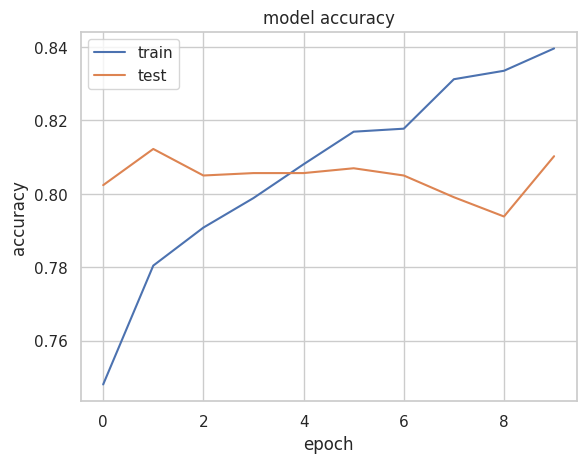

In [36]:
plot_hist(history)

In [37]:
save_submission(model1, test_token, 'submission1.csv')

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Analysis**

The accuracy plot shows that training accuracy steadily increases with each epoch. However, the validation accuracy fluctuates and does not follow the same upward trend, indicating that the model may be beginning to overfit the training data.

To address this, we can experiment with several strategies:

  -Add Regularization to reduce model complexity and improve generalization

  -Modify Dropout Rates to find a better balance between underfitting and overfitting

  -Tune LSTM Parameters, such as the number of units or layers

  -Implement Early Stopping to halt training when validation performance stops improving

  -Experiment with Learning Rates to optimize convergence

  -Use a Bidirectional LSTM to allow the model to learn from both past and future context in the sequence












**Model#2**

Mostly keeping model from #1 above intact. We are changing dropout to 0.3

In [38]:
embed_dim = 100
lstm_out = 100
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model2.add(Dropout(0.3))
model2.add(LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.4))
model2.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model2.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [39]:
history_diff_dropout = model2.fit(X,y, epochs = 10,validation_split = 0.2, batch_size=32)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.6921 - loss: 0.5751 - val_accuracy: 0.8083 - val_loss: 0.4469
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7660 - loss: 0.5066 - val_accuracy: 0.8083 - val_loss: 0.4366
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.7758 - loss: 0.4836 - val_accuracy: 0.8083 - val_loss: 0.4483
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.7814 - loss: 0.4751 - val_accuracy: 0.8063 - val_loss: 0.4373
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.7975 - loss: 0.4578 - val_accuracy: 0.8142 - val_loss: 0.4251
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.8066 - loss: 0.4455 - val_accuracy: 0.8096 - val_loss: 0.4327
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.7985 - loss: 0.4414 - val_accuracy: 0.8109 - val_loss: 0.4381
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.8066 - loss: 0.4391 - 

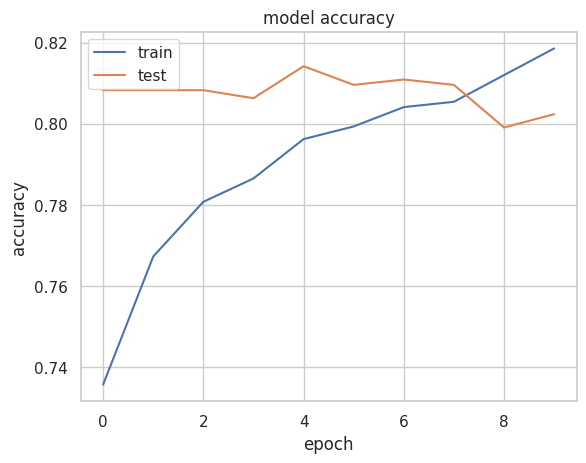

In [40]:
plot_hist(history_diff_dropout)

In [41]:
save_submission(model2, test_token, 'submission2.csv')

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model#3**

Changing **learning rate from 0.002 to 0.0001**. Keeping rest of model from #2 above.

In [42]:
embed_dim = 100
lstm_out = 100
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model3.add(Dropout(0.3))
model3.add(LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.4))
model3.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.0001)
model3.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model3.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
history_diff_lr = model3.fit(X,y, epochs = 10,validation_split = 0.2, batch_size=32)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.5718 - loss: 0.6727 - val_accuracy: 0.7735 - val_loss: 0.5593
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.7286 - loss: 0.5730 - val_accuracy: 0.7938 - val_loss: 0.4760
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.7564 - loss: 0.5277 - val_accuracy: 0.7965 - val_loss: 0.4624
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7505 - loss: 0.5236 - val_accuracy: 0.7997 - val_loss: 0.4570
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7531 - loss: 0.5135 - val_accuracy: 0.7991 - val_loss: 0.4535
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7469 - loss: 0.5166 - val_accuracy: 0.8011 - val_loss: 0.4593
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.7604 - loss: 0.5000 - val_accuracy: 0.8024 - val_loss: 0.4494
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.7611 - loss: 0.5006 - 

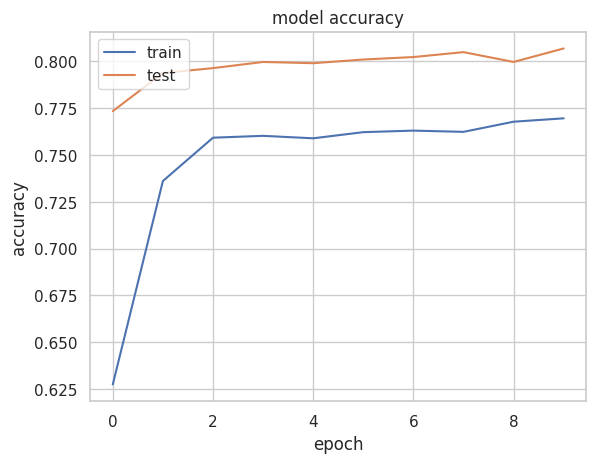

In [44]:
plot_hist(history_diff_lr)

In [45]:
save_submission(model3, test_token, 'submission3.csv')

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
history_diff_lr_batch = model3.fit(X,y, epochs = 20,validation_split = 0.2, batch_size=64)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.7800 - loss: 0.4878 - val_accuracy: 0.8030 - val_loss: 0.4434
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7660 - loss: 0.4921 - val_accuracy: 0.8017 - val_loss: 0.4454
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.7697 - loss: 0.4816 - val_accuracy: 0.8070 - val_loss: 0.4460
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.7672 - loss: 0.4976 - val_accuracy: 0.8043 - val_loss: 0.4428
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.7791 - loss: 0.4883 - val_accuracy: 0.8089 - val_loss: 0.4459
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7816 - loss: 0.4778 - val_accuracy: 0.8056 - val_loss: 0.4405
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.7837 - loss: 0.4818 - val_accuracy: 0.8076 - val_loss: 0.4441
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.7725 - loss: 0.4786 - val_accuracy: 0.80

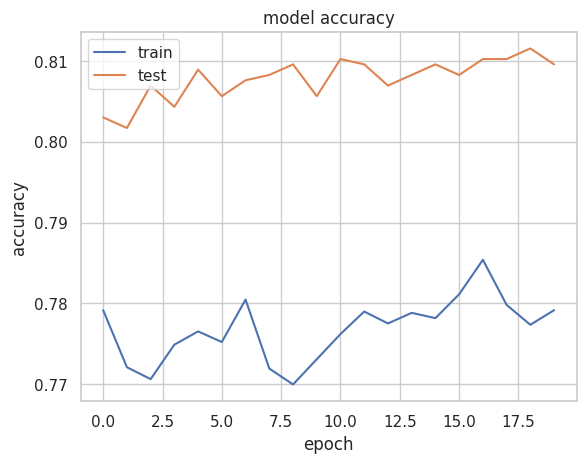

In [47]:
plot_hist(history_diff_lr_batch)

**Model#4**

In this version, we introduce several modifications based on Model #2 to enhance performance and address overfitting:

Stacked LSTM Layers: This architecture uses two LSTM layers stacked sequentially. Stacking LSTMs allows the model to learn more complex and abstract patterns from the data. The first LSTM layer is configured with return_sequences=True, meaning it passes the entire output sequence to the next LSTM layer instead of just the final time step, enabling deeper sequence learning.

Additional Dropout Layers: Dropout layers with a rate of 0.3 are added after each LSTM layer to help reduce overfitting. These layers randomly deactivate a portion of LSTM outputs during training, encouraging the model to be more robust.

L1 Regularization on Output Layer: L1 regularization is applied to both the kernel and bias of the final Dense layer. This type of regularization encourages sparsity in the model’s weights, which can be especially useful when dealing with potentially irrelevant input features, promoting better generalization.


In [48]:
embed_dim = 100
lstm_out = 100
model4 = Sequential()
model4.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model4.add(Dropout(0.3))
model4.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.3))
model4.add(Dropout(0.3))
model4.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.3))
model4.add(Dropout(0.3))
#model4.add(Dense(1,activation='sigmoid'))

model4.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l1(0.01),
                 bias_regularizer=tf.keras.regularizers.l1(0.01)))

#dense_layer = model4.layers[-1]
#dense_layer.kernel_regularizer = tf.keras.regularizers.l1(0.01)
#dense_layer.bias_regularizer = tf.keras.regularizers.l1(0.01)


adam = optimizers.Adam(learning_rate=0.002)
model4.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model4.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [49]:
history_model4b = model4.fit(X,y, epochs = 20,validation_split = 0.2, batch_size=32)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 151ms/step - accuracy: 0.7129 - loss: 0.6411 - val_accuracy: 0.7846 - val_loss: 0.5203
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 145ms/step - accuracy: 0.7706 - loss: 0.5338 - val_accuracy: 0.8076 - val_loss: 0.4706
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.7831 - loss: 0.5072 - val_accuracy: 0.8050 - val_loss: 0.4733
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 150ms/step - accuracy: 0.7699 - loss: 0.5158 - val_accuracy: 0.8063 - val_loss: 0.4626
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 146ms/step - accuracy: 0.7953 - loss: 0.4933 - val_accuracy: 0.8056 - val_loss: 0.4724
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.7933 - loss: 0.4868 - val_accuracy: 0.8116 - val_loss: 0.4559
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.8003 - loss: 0.4876 - val_accuracy: 0.8129 - val_loss: 0.4751
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.8187 - loss: 0

In [50]:
save_submission(model4, test_token, 'submission4b.csv')

102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

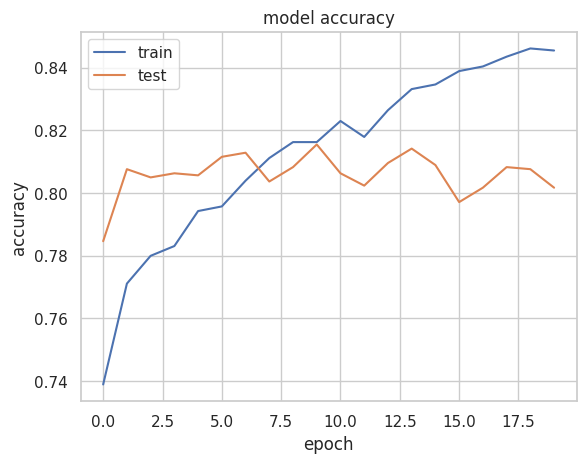

In [51]:
plot_hist(history_model4b)

Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 30s 156ms/step - accuracy: 0.8479 - loss: 0.3873 - val_accuracy: 0.8070 - val_loss: 0.5016
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 154ms/step - accuracy: 0.8569 - loss: 0.3779 - val_accuracy: 0.8043 - val_loss: 0.4861
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - accuracy: 0.8550 - loss: 0.3752 - val_accuracy: 0.7984 - val_loss: 0.5030
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 149ms/step - accuracy: 0.8553 - loss: 0.3702 - val_accuracy: 0.8043 - val_loss: 0.4943
Epoch 5/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 146ms/step - accuracy: 0.8609 - loss: 0.3739 - val_accuracy: 0.7991 - val_loss: 0.5132
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

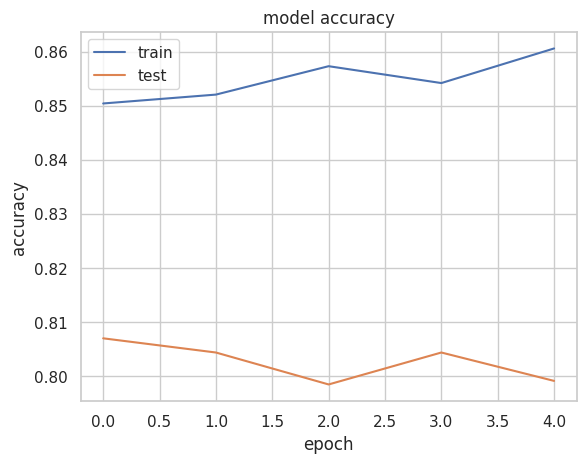

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the early stopping callback
history_model4d = model4.fit(X,y, epochs = 25,validation_split = 0.2, batch_size=32,callbacks=[early_stopping])
save_submission(model4, test_token, 'submission4d.csv')
plot_hist(history_model4d)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 65s 148ms/step - accuracy: 0.7188 - loss: 0.5704 - val_accuracy: 0.8030 - val_loss: 0.4514
Epoch 2/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 56s 146ms/step - accuracy: 0.7757 - loss: 0.5005 - val_accuracy: 0.8024 - val_loss: 0.4573
Epoch 3/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 81s 145ms/step - accuracy: 0.7820 - loss: 0.4919 - val_accuracy: 0.8037 - val_loss: 0.4389
Epoch 4/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - accuracy: 0.7894 - loss: 0.4677 - val_accuracy: 0.8089 - val_loss: 0.4341
Epoch 5/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 81s 144ms/step - accuracy: 0.7990 - loss: 0.4460 - val_accuracy: 0.8011 - val_loss: 0.4427
Epoch 6/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 145ms/step - accuracy: 0.8070 - loss: 0.4425 - val_accuracy: 0.8030 - val_loss: 0.4350
Epoch 7/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 82s 146ms/step - accuracy: 0.8089 - loss: 0.4392 - val_accuracy: 0.8056 - val_loss: 0.4440
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

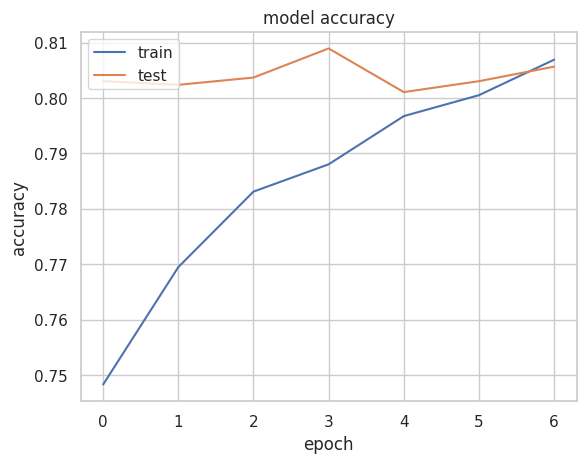

In [53]:
embed_dim = 100
lstm_out = 100
model6 = Sequential()
model6.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model6.add(Dropout(0.3))
model6.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.3))
model6.add(Dropout(0.3))
model6.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.3))
model6.add(Dropout(0.3))
model6.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l2(0.01),
                 bias_regularizer=tf.keras.regularizers.l2(0.01)))



adam = optimizers.Adam(learning_rate=0.002)
model6.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model6.summary())

history_model6 = model6.fit(X,y, epochs = 25,validation_split = 0.2, batch_size=16,callbacks=[early_stopping])
save_submission(model6, test_token, 'week4_submission6.csv')
plot_hist(history_model6)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 151ms/step - accuracy: 0.6207 - loss: 0.7019 - val_accuracy: 0.7827 - val_loss: 0.5624
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 146ms/step - accuracy: 0.7425 - loss: 0.5890 - val_accuracy: 0.7833 - val_loss: 0.5150
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.7563 - loss: 0.5526 - val_accuracy: 0.7886 - val_loss: 0.4986
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.7568 - loss: 0.5453 - val_accuracy: 0.7892 - val_loss: 0.4934
Epoch 5/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.7766 - loss: 0.5199 - val_accuracy: 0.7932 - val_loss: 0.4807
Epoch 6/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.7764 - loss: 0.5192 - val_accuracy: 0.7951 - val_loss: 0.4762
Epoch 7/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.7676 - loss: 0.5273 - val_accuracy: 0.7978 - val_loss: 0.4706
Epoch 8/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 145ms/step - accuracy: 0.7718 - lo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

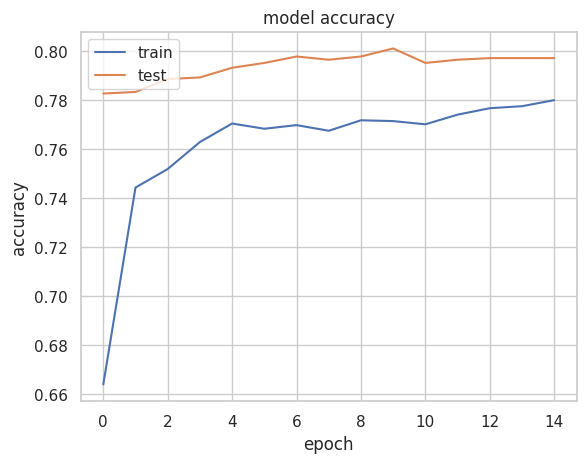

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


embed_dim = 100
lstm_out = 100
model6b = Sequential()
model6b.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model6b.add(Dropout(0.3))
model6b.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.2))
model6b.add(Dropout(0.3))
model6b.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model6b.add(Dropout(0.3))
model6b.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l2(0.02),
                 bias_regularizer=tf.keras.regularizers.l2(0.02)))



adam = optimizers.Adam(learning_rate=0.0001)
model6b.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model6b.summary())

history_model6b = model6b.fit(X,y, epochs = 25,validation_split = 0.2, batch_size=32,callbacks=[early_stopping])
save_submission(model6b, test_token, 'week4_submission6b.csv')
plot_hist(history_model6b)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 152ms/step - accuracy: 0.6034 - loss: 0.7015 - val_accuracy: 0.7794 - val_loss: 0.5580
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 29s 153ms/step - accuracy: 0.7508 - loss: 0.5760 - val_accuracy: 0.7833 - val_loss: 0.5196
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 147ms/step - accuracy: 0.7608 - loss: 0.5462 - val_accuracy: 0.7886 - val_loss: 0.4952
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.7637 - loss: 0.5365 - val_accuracy: 0.7919 - val_loss: 0.4854
Epoch 5/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.7621 - loss: 0.5181 - val_accuracy: 0.7905 - val_loss: 0.4788
Epoch 6/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.7668 - loss: 0.5179 - val_accuracy: 0.7925 - val_loss: 0.4758
Epoch 7/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.7745 - loss: 0.5081 - val_accuracy: 0.7958 - val_loss: 0.4709
Epoch 8/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 44s 165ms/step - accuracy: 0.7835 - lo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

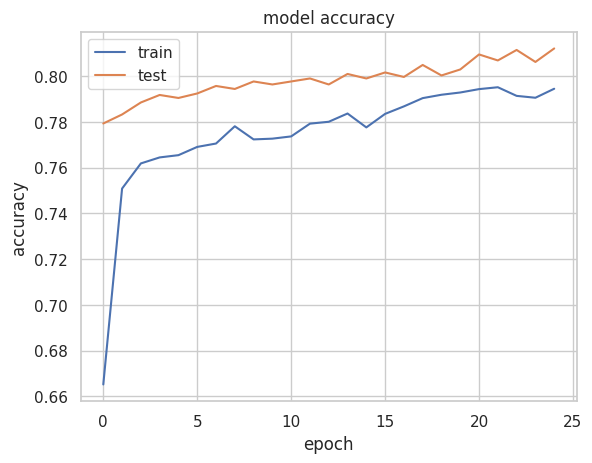

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


embed_dim = 100
lstm_out = 100
model6c = Sequential()
model6c.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model6c.add(Dropout(0.2))
model6c.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.2))
model6c.add(Dropout(0.2))
model6c.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model6c.add(Dropout(0.2))
model6c.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l2(0.02),
                 bias_regularizer=tf.keras.regularizers.l2(0.02)))



adam = optimizers.Adam(learning_rate=0.0001)
model6c.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model6c.summary())

history_model6c = model6c.fit(X,y, epochs = 25,validation_split = 0.2, batch_size=32,callbacks=[early_stopping])
save_submission(model6c, test_token, 'week4_submission6c.csv')
plot_hist(history_model6c)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - accuracy: 0.5900 - loss: 0.8162 - val_accuracy: 0.7610 - val_loss: 0.5642
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 30s 156ms/step - accuracy: 0.6722 - loss: 0.6888 - val_accuracy: 0.7748 - val_loss: 0.5233
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.7054 - loss: 0.6484 - val_accuracy: 0.7827 - val_loss: 0.5269
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 159ms/step - accuracy: 0.7106 - loss: 0.6232 - val_accuracy: 0.7899 - val_loss: 0.5229
Epoch 5/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 157ms/step - accuracy: 0.7135 - loss: 0.6252 - val_accuracy: 0.7899 - val_loss: 0.5159
Epoch 6/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 160ms/step - accuracy: 0.7318 - loss: 0.5956 - val_accuracy: 0.7912 - val_loss: 0.5136
Epoch 7/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.7396 - loss: 0.5824 - val_accuracy: 0.7951 - val_loss: 0.5098
Epoch 8/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 156ms/step - accuracy: 0.7297 - lo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

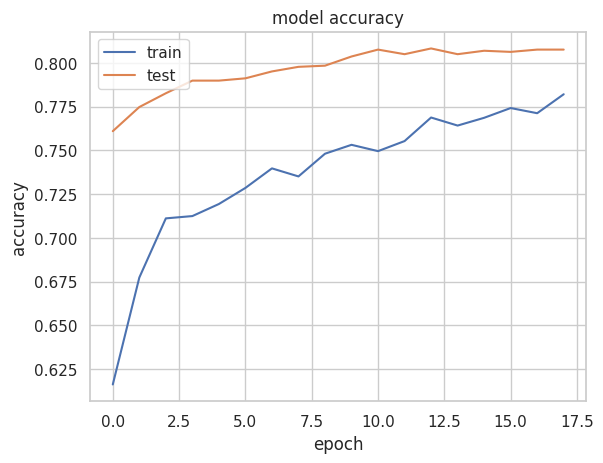

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


embed_dim = 100
lstm_out = 100
model6d = Sequential()
model6d.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
# Add batch normalization layer after embedding
model6d.add(BatchNormalization())
model6d.add(Dropout(0.2))
model6d.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.2))
model6d.add(BatchNormalization())
model6d.add(Dropout(0.2))
model6d.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model6d.add(BatchNormalization())
model6d.add(Dropout(0.2))
model6d.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l2(0.02),
                 bias_regularizer=tf.keras.regularizers.l2(0.02)))



adam = optimizers.Adam(learning_rate=0.0001)
model6d.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model6d.summary())

history_model6d = model6d.fit(X,y, epochs = 25,validation_split = 0.2, batch_size=32,callbacks=[early_stopping])
save_submission(model6d, test_token, 'week4_submission6d.csv')
plot_hist(history_model6d)

In [57]:
history_reg = model4.fit(X,y, epochs = 20,validation_split = 0.2, batch_size=32)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.8546 - loss: 0.3901 - val_accuracy: 0.8024 - val_loss: 0.5027
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 154ms/step - accuracy: 0.8683 - loss: 0.3646 - val_accuracy: 0.8083 - val_loss: 0.4876
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 152ms/step - accuracy: 0.8621 - loss: 0.3689 - val_accuracy: 0.8096 - val_loss: 0.5066
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 148ms/step - accuracy: 0.8632 - loss: 0.3680 - val_accuracy: 0.7912 - val_loss: 0.5129
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.8702 - loss: 0.3529 - val_accuracy: 0.7945 - val_loss: 0.5236
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.8731 - loss: 0.3552 - val_accuracy: 0.7938 - val_loss: 0.5088
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.8659 - loss: 0.3578 - val_accuracy: 0.7912 - val_loss: 0.5314
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.8663 - loss: 0

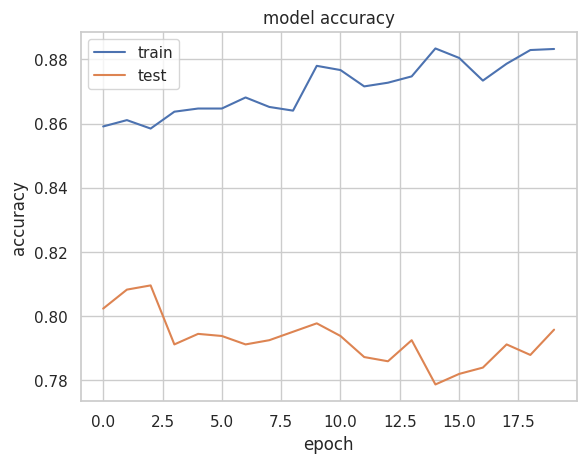

In [58]:
plot_hist(history_reg)

In [59]:
save_submission(model4, test_token, 'submission4.csv')

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
embed_dim = 100
lstm_out = 100
model5 = Sequential()
model5.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model5.add(Dropout(0.3))
model5.add(Bidirectional(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.3)))
model5.add(Dropout(0.3))
model5.add(Bidirectional(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.3)))
model5.add(Dropout(0.3))
#model5.add(Dense(1,activation='sigmoid'))

model5.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l1(0.01),
                 bias_regularizer=tf.keras.regularizers.l1(0.01)))

#dense_layer = model5.layers[-1]
#dense_layer.kernel_regularizer = tf.keras.regularizers.l1(0.01)
#dense_layer.bias_regularizer = tf.keras.regularizers.l1(0.01)


adam = optimizers.Adam(learning_rate=0.002)
model5.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model5.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [61]:
history_model5b = model5.fit(X,y, epochs = 20,validation_split = 0.2, batch_size=32)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 289ms/step - accuracy: 0.7233 - loss: 0.6472 - val_accuracy: 0.7912 - val_loss: 0.5139
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 277ms/step - accuracy: 0.7840 - loss: 0.5158 - val_accuracy: 0.7853 - val_loss: 0.5358
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 82s 277ms/step - accuracy: 0.7762 - loss: 0.5201 - val_accuracy: 0.8116 - val_loss: 0.4752
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.7870 - loss: 0.4985 - val_accuracy: 0.8024 - val_loss: 0.4697
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 279ms/step - accuracy: 0.7999 - loss: 0.4795 - val_accuracy: 0.8063 - val_loss: 0.4608
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 82s 280ms/step - accuracy: 0.7984 - loss: 0.4785 - val_accuracy: 0.8076 - val_loss: 0.4675
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 83s 283ms/step - accuracy: 0.8075 - loss: 0.4706 - val_accuracy: 0.8070 - val_loss: 0.4719
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 81s 281ms/step - accuracy: 0.8048 - loss: 0

**Model#5**

As above modified model did not improve much, we go back to Model#2 and try BiDircetional LSTM

In [62]:
embed_dim = 100
lstm_out = 100

embed_dim = 100
lstm_out = 100
model5 = Sequential()
model5.add(Embedding(input_dim=vocab_length, output_dim=100, embeddings_initializer=Constant(embedding_matrix), trainable=False))
model5.add(Dropout(0.3))
model5.add(Bidirectional(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.2)))
model5.add(Dropout(0.3))
model5.add(Bidirectional(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2)))
model5.add(Dropout(0.3))
model5.add(Dense(1,activation='sigmoid'))

adam = optimizers.Adam(learning_rate=0.002)
model5.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model5.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [63]:
history_bi = model5.fit(X,y, epochs = 10,validation_split = 0.2, batch_size=32)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 69s 291ms/step - accuracy: 0.7258 - loss: 0.5461 - val_accuracy: 0.8089 - val_loss: 0.4418
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 54s 283ms/step - accuracy: 0.7744 - loss: 0.4779 - val_accuracy: 0.8096 - val_loss: 0.4363
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 83s 287ms/step - accuracy: 0.7987 - loss: 0.4588 - val_accuracy: 0.8181 - val_loss: 0.4367
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 82s 287ms/step - accuracy: 0.7929 - loss: 0.4608 - val_accuracy: 0.8122 - val_loss: 0.4374
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 84s 295ms/step - accuracy: 0.8036 - loss: 0.4425 - val_accuracy: 0.8043 - val_loss: 0.4304
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 80s 288ms/step - accuracy: 0.7954 - loss: 0.4461 - val_accuracy: 0.8024 - val_loss: 0.4324
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 81s 281ms/step - accuracy: 0.8118 - loss: 0.4274 - val_accuracy: 0.8083 - val_loss: 0.4453
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 82s 282ms/step - accuracy: 0.8094 - loss: 0

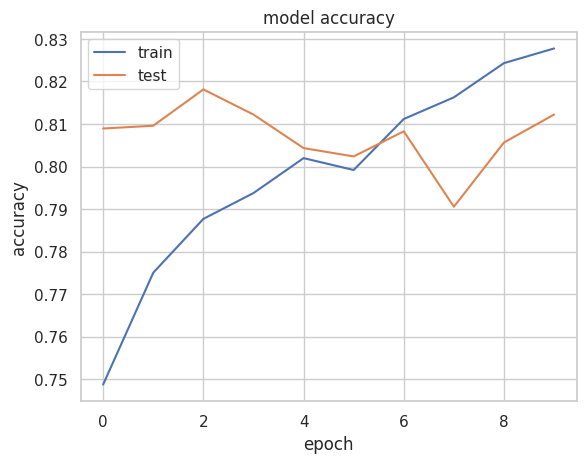

In [64]:
plot_hist(history_bi)

In [65]:
save_submission(model5, test_token, 'submission5.csv')

102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysis

I experimented with several variations of LSTM models and submitted their predictions on the test set to Kaggle. Throughout this process, I had to be cautious, as many models showed a tendency to overfit the training data.

My public leaderboard scores ranged from 0.77 to 0.80, with the best-performing model achieving a score of 0.80202 and a rank of 431. This model used a dropout rate of 0.30, which helped strike a good balance between learning and regularization.

I also experimented with changing the learning rate, adding regularization, applying batch normalization, and using a Bidirectional LSTM. While these modifications sometimes improved training accuracy, they often led to overfitting, and none outperformed the simpler dropout-optimized model.

**Model #1:**

Pros: Best Kaggle score, simpler and more efficient model, strong generalization despite occasional overfitting.

Cons: Slight risk of overfitting in later epochs (as seen in the plots), less contextual power than BiLSTM.

**Model #5:**

Pros: Strong validation performance, bidirectional LSTM allows richer context learning, more balanced training and generalization behavior.

Cons: Slightly lower Kaggle score than #1 (~0.002 difference), more complex and slower to train.

Picked **Model #1** as final model for the assignment.

It achieved the highest Kaggle score (0.80202).

Despite being simpler, it generalizes well, is easier to interpret and deploy, and the overfitting was manageable.


# Conclusion




This project provided valuable hands-on experience with key concepts in Natural Language Processing (NLP). One unexpected challenge was encountering overfitting even with a relatively small number of training epochs.

In the future, I’d like to explore deeper architectures by adding more layers, experiment with different word embeddings and tokenization methods, and apply alternative validation techniques—such as k-fold cross-validation—to better evaluate model performance and improve generalization.









# References



*   [LSTM](https://keras.io/api/layers/recurrent_layers/lstm/)
*   [Embeddings-LSTM](https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained)



# Github Link

[Github Project Link](https://github.com/manjit28/dtsa5511.git)

Project contains:

* Python Notebook
* Kaggle Project Leader Score